Framingham Dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgbm
from sklearn.svm import SVC
import xgboost as xgb
import torch
import torch.nn as nn
import torch.optim as optim
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

df = pd.read_csv("framingham.csv")
#check if the dataset is loaded
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
df.shape

(4240, 16)

  Initial Analysis

In [ ]:
df.isnull().sum()

,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
df.fillna(df.mode().iloc[0], inplace=True)

In [ ]:
df.isnull().sum()

,0
male,0
age,0
education,0
currentSmoker,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [ ]:
df.duplicated().sum()

np.int64(0)

Exploratory Data Analysis

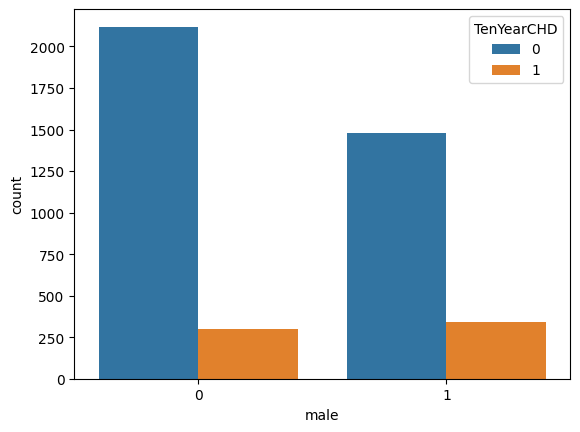

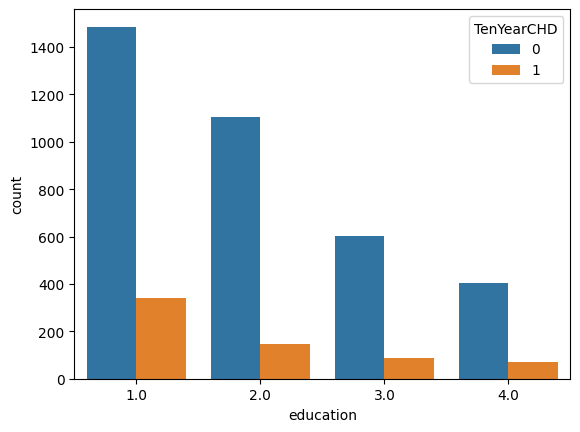

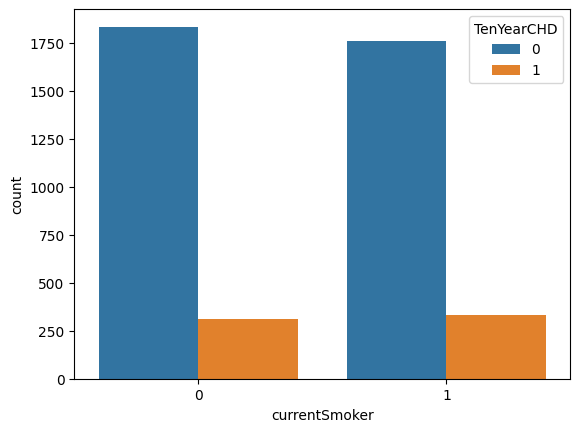

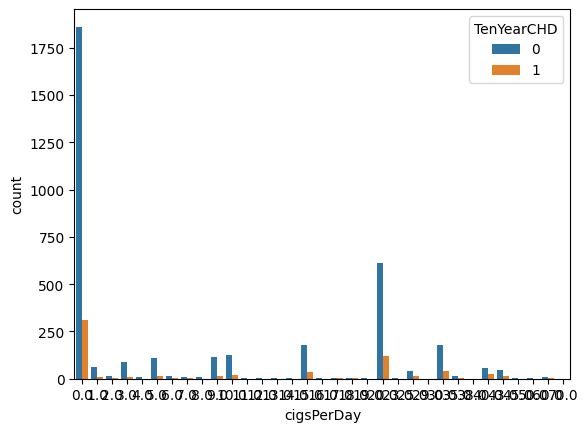

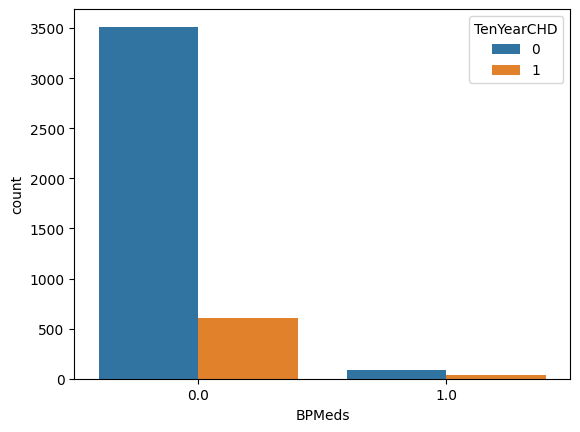

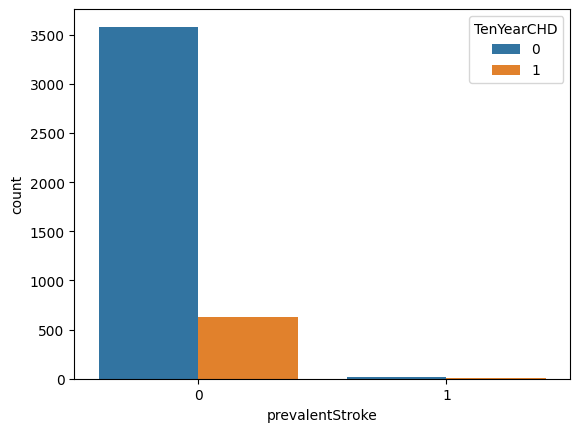

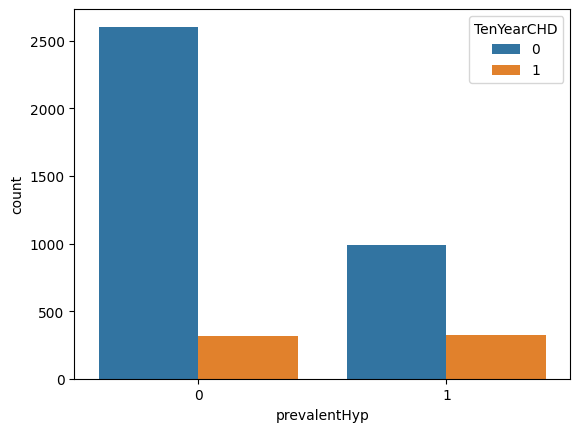

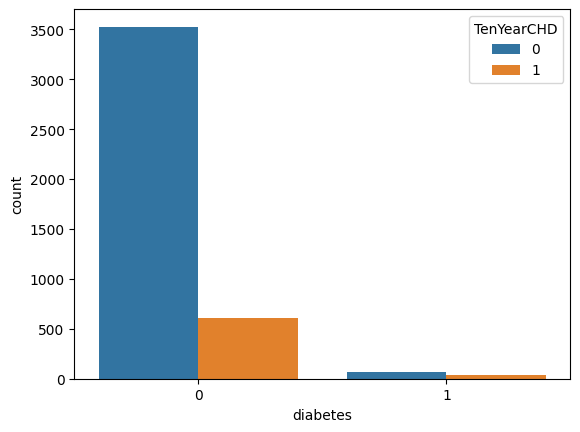

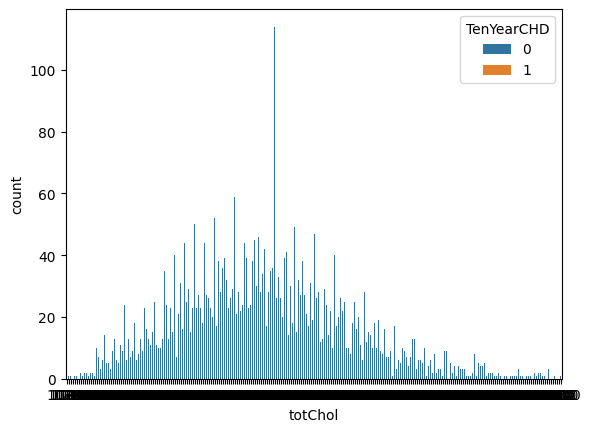

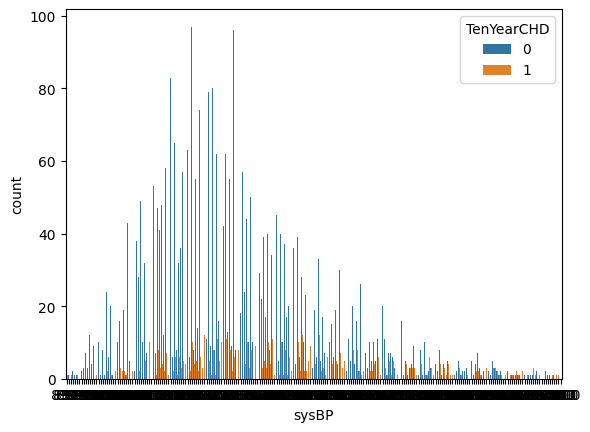

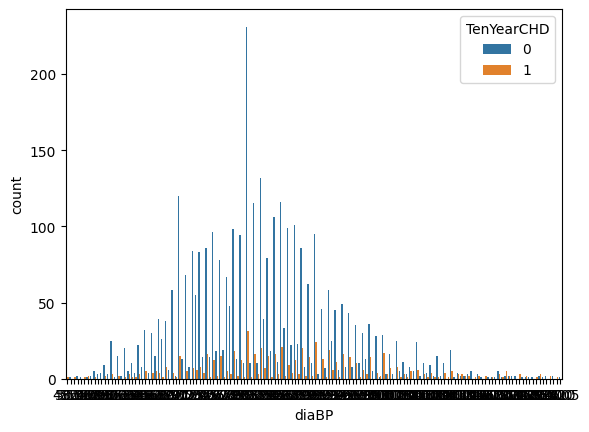

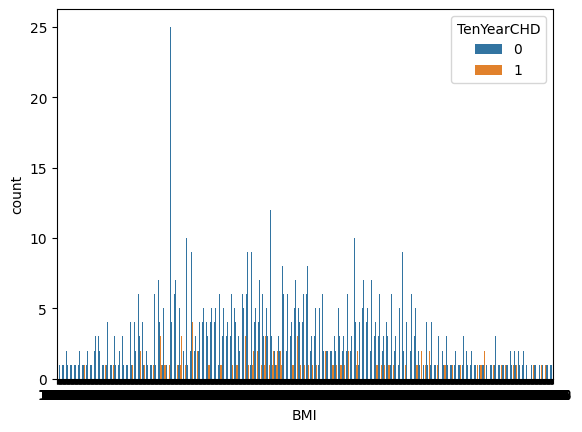

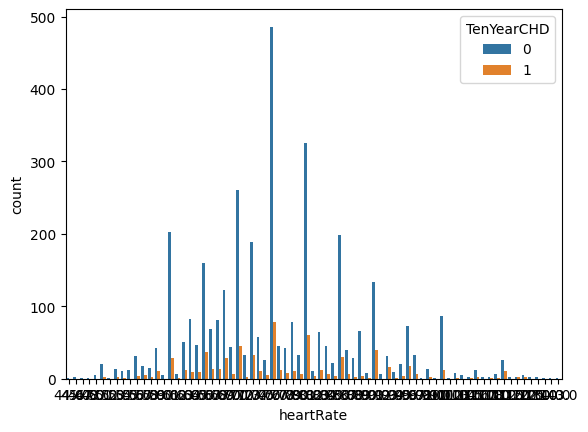

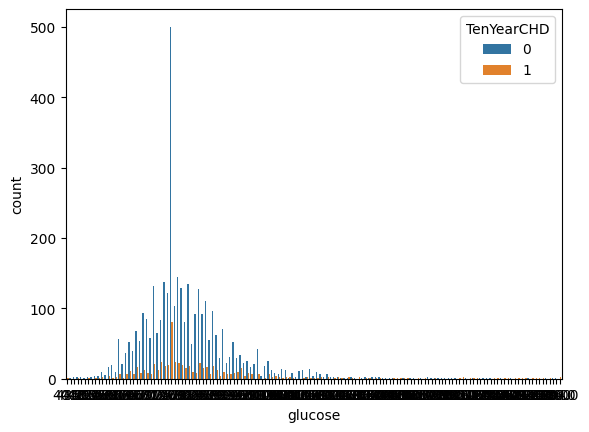

In [ ]:
df_cat_attributes = [col for col in df.columns if col != "age" and col!='TenYearCHD']
for attr in df_cat_attributes:
  sns.countplot(x =attr, hue = "TenYearCHD", data = df)
  plt.show()
  plt.show()


Data Preprocessing

In [ ]:
X=df.drop(columns=['TenYearCHD'])
y=df['TenYearCHD']

In [ ]:
num_before = dict(Counter(y))

# Perform SMOTE
# Define Pipeline
over=SMOTE(sampling_strategy=0.8)
under=RandomUnderSampler(sampling_strategy=0.8)
steps=[("o",over),("u",under)]
pipeline = Pipeline(steps=steps)

# Transform the dataset
X_smote,y_smote=pipeline.fit_resample(X,y)

# The numbers after SMOTE
num_after=dict(Counter(y_smote))

In [ ]:
print(num_before,num_after)

{0: 3596, 1: 644} {0: 3595, 1: 2876}


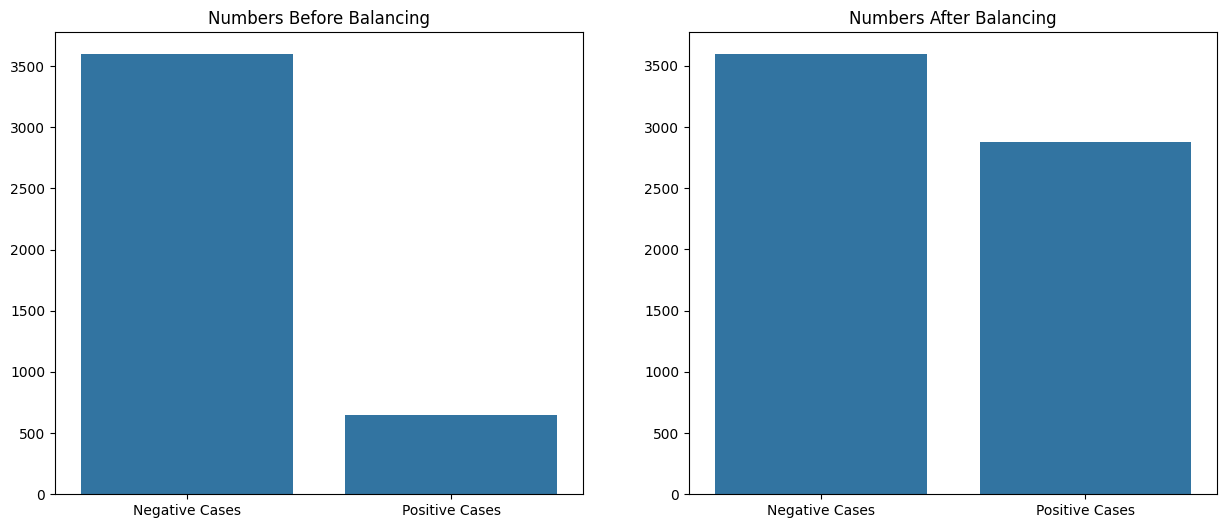

In [ ]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(x=labels, y=list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

In [ ]:
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1912,0,47,1.0,0,0.0,0.0,0,0,0,228.0,118.0,84.0,18.67,75.0,90.0,0
1478,0,57,1.0,0,0.0,1.0,0,1,0,190.0,155.0,85.0,26.08,55.0,66.0,0
3387,1,37,2.0,1,30.0,0.0,0,0,0,249.0,112.0,70.0,22.79,56.0,76.0,0
2965,1,39,1.0,1,20.0,0.0,0,0,0,202.0,108.0,74.0,25.51,64.0,104.0,0
1047,1,42,2.0,0,0.0,0.0,0,1,0,164.0,141.5,98.0,32.52,72.0,76.0,0


In [ ]:
X_new = new_data.iloc[:, 0:14]
y_new= new_data.iloc[:,-1]
X_new.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate
1912,0,47,1.0,0,0.0,0.0,0,0,0,228.0,118.0,84.0,18.67,75.0
1478,0,57,1.0,0,0.0,1.0,0,1,0,190.0,155.0,85.0,26.08,55.0
3387,1,37,2.0,1,30.0,0.0,0,0,0,249.0,112.0,70.0,22.79,56.0
2965,1,39,1.0,1,20.0,0.0,0,0,0,202.0,108.0,74.0,25.51,64.0
1047,1,42,2.0,0,0.0,0.0,0,1,0,164.0,141.5,98.0,32.52,72.0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y_new,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5176, 14)
(5176,)
(1295, 14)
(1295,)


In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train=pd.DataFrame(X_train_scaled)
X_test=pd.DataFrame(X_test_scaled)

Random Forest

In [ ]:
param_grid = {
    'n_estimators': [25, 30, 40, 50, 75, 100, 150, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [8, 9, 10, 11, 12],
    'criterion' :['gini', 'entropy']
}
randfor = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
randfor.fit(X_train, y_train)

print(randfor.best_params_)


{'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 200}


              precision    recall  f1-score   support

           0       0.86      0.90      0.88       734
           1       0.86      0.81      0.84       561

    accuracy                           0.86      1295
   macro avg       0.86      0.86      0.86      1295
weighted avg       0.86      0.86      0.86      1295



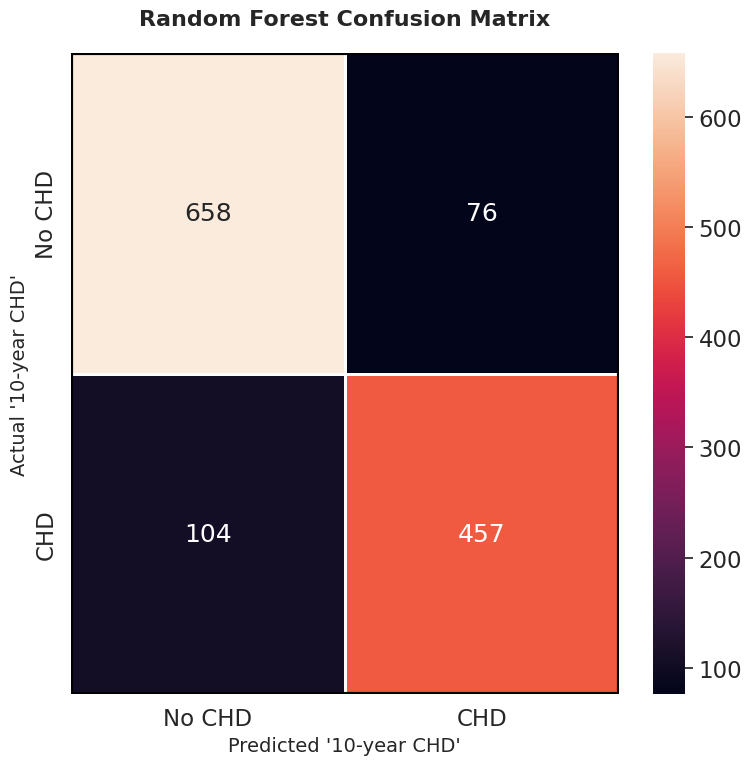

In [ ]:
y_pred_randfor = randfor.predict(X_test)

print(classification_report(y_test, y_pred_randfor))

confusion_randfor = confusion_matrix(y_test, y_pred_randfor)

with sns.plotting_context("notebook", font_scale=1.5), sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(8,8))

    class_labels = ["No CHD", "CHD"]
    sns.heatmap(confusion_randfor, annot=True, fmt="d", cmap='rocket', linewidths=2, xticklabels=class_labels, yticklabels=class_labels, ax=ax)
    ax.set_title('Random Forest Confusion Matrix', fontsize=16, weight='bold', pad=20)
    ax.set_xlabel("Predicted '10-year CHD'", fontsize=14)
    ax.set_ylabel("Actual '10-year CHD'", fontsize=14)
    ax.axhline(y=0, color='black', linewidth=3)
    ax.axhline(y=confusion_randfor.shape[0], color='black', linewidth=3)
    ax.axvline(x=0, color='black', linewidth=3)
    ax.axvline(x=confusion_randfor.shape[1], color='black', linewidth=3)

    # Improve layout
    plt.tight_layout()
    plt.show()


In [ ]:
randfor_recall_score = recall_score(y_test, y_pred_randfor, labels=[1])
randfor_avg_recall_score = recall_score(y_test, y_pred_randfor, average="weighted")
print(f"Random Forest Classifier Recall ('YES'): {randfor_recall_score}")

Random Forest Classifier Recall ('YES'): 0.8146167557932263


Logistic Regression

In [ ]:
param_grid={
    'C':[0.001,0.01,0.1,1,10,100,1000],
    'penalty':['l1','l2'],
    'solver':['liblinear']
}
logistic_regression = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
logistic_regression.fit(X_train, y_train)

print(logistic_regression.best_params_)


{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


              precision    recall  f1-score   support

           0       0.68      0.71      0.69       734
           1       0.60      0.57      0.58       561

    accuracy                           0.65      1295
   macro avg       0.64      0.64      0.64      1295
weighted avg       0.65      0.65      0.65      1295



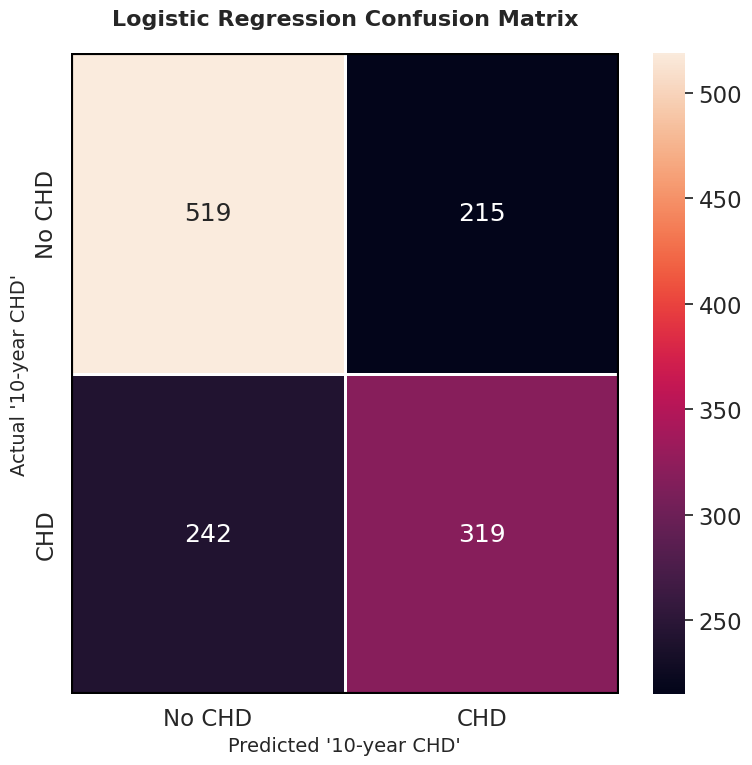

In [ ]:
y_pred_logistic =logistic_regression.predict(X_test)

print(classification_report(y_test, y_pred_logistic))

confusion_logistic = confusion_matrix(y_test, y_pred_logistic)

with sns.plotting_context("notebook", font_scale=1.5), sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(8,8))

    class_labels = ["No CHD", "CHD"]
    sns.heatmap(confusion_logistic, annot=True, fmt="d", cmap='rocket', linewidths=2, xticklabels=class_labels, yticklabels=class_labels, ax=ax)
    ax.set_title('Logistic Regression Confusion Matrix', fontsize=16, weight='bold', pad=20)
    ax.set_xlabel("Predicted '10-year CHD'", fontsize=14)
    ax.set_ylabel("Actual '10-year CHD'", fontsize=14)
    ax.axhline(y=0, color='black', linewidth=3)
    ax.axhline(y=confusion_logistic.shape[0], color='black', linewidth=3)
    ax.axvline(x=0, color='black', linewidth=3)
    ax.axvline(x=confusion_logistic.shape[1], color='black', linewidth=3)

    # Improve layout
    plt.tight_layout()
    plt.show()


XGBoost

In [ ]:
param_grid={
    'n_estimators':[50,100,200],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,4,5,7],
    'min_child_weight':[1,3,5],
    'subsample':[0.5,0.7,0.8,1.0],
    'colsample_bytree':[0.5,0.7,0.8,1.0]
}
xgboost = GridSearchCV(xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', random_state=42), param_grid, cv=5)
xgboost.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.5, 0.7, 0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5, 7],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [50, 100, 200],
                         'subsample': [0.5, 0.7, 0.8, 1.0]})

In [ ]:
print(xgboost.best_params_)

{'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}


              precision    recall  f1-score   support

           0       0.88      0.93      0.90       734
           1       0.89      0.83      0.86       561

    accuracy                           0.88      1295
   macro avg       0.88      0.88      0.88      1295
weighted avg       0.88      0.88      0.88      1295



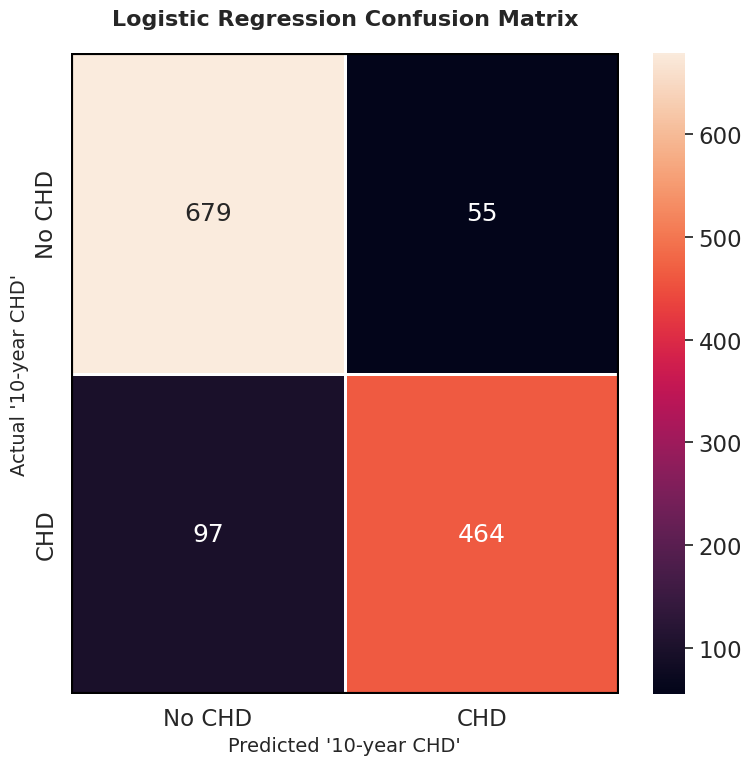

In [ ]:
y_pred_xgboost =xgboost.predict(X_test)

print(classification_report(y_test, y_pred_xgboost))

confusion_xgboost = confusion_matrix(y_test, y_pred_xgboost)

with sns.plotting_context("notebook", font_scale=1.5), sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(8,8))

    class_labels = ["No CHD", "CHD"]
    sns.heatmap(confusion_xgboost, annot=True, fmt="d", cmap='rocket', linewidths=2, xticklabels=class_labels, yticklabels=class_labels, ax=ax)
    ax.set_title('Logistic Regression Confusion Matrix', fontsize=16, weight='bold', pad=20)
    ax.set_xlabel("Predicted '10-year CHD'", fontsize=14)
    ax.set_ylabel("Actual '10-year CHD'", fontsize=14)
    ax.axhline(y=0, color='black', linewidth=3)
    ax.axhline(y=confusion_xgboost.shape[0], color='black', linewidth=3)
    ax.axvline(x=0, color='black', linewidth=3)
    ax.axvline(x=confusion_xgboost.shape[1], color='black', linewidth=3)

    # Improve layout
    plt.tight_layout()
    plt.show()

Neural Networks


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1).to(device)

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self,input_size):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork(X_train.shape[1]).to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=14, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


In [ ]:
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 100
batch_size = 16
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [10/100], Loss: 0.6377
Epoch [20/100], Loss: 0.6076
Epoch [30/100], Loss: 0.5891
Epoch [40/100], Loss: 0.5788
Epoch [50/100], Loss: 0.5699
Epoch [60/100], Loss: 0.5610
Epoch [70/100], Loss: 0.5522
Epoch [80/100], Loss: 0.5429
Epoch [90/100], Loss: 0.5330
Epoch [100/100], Loss: 0.5225


In [ ]:
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    y_pred_labels = (y_pred_test > 0.5).float()  # Convert probabilities to binary values (0 or 1)

# Convert predictions to numpy for evaluation
y_pred_np = y_pred_labels.cpu().numpy()
y_test_np = y_test_tensor.cpu().numpy()

# Calculate accuracy
accuracy = accuracy_score(y_test_np, y_pred_np)
print("Test Set Accuracy:", accuracy)

Test Set Accuracy: 0.7034749034749035


KNN


In [ ]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],  # Number of nearest neighbors
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Initialize and train KNN with GridSearchCV
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)
knn_grid.fit(X_train, y_train)

# Best parameters
print("Best KNN Parameters:", knn_grid.best_params_)

Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


              precision    recall  f1-score   support

           0       0.92      0.73      0.81       734
           1       0.72      0.92      0.81       561

    accuracy                           0.81      1295
   macro avg       0.82      0.82      0.81      1295
weighted avg       0.83      0.81      0.81      1295



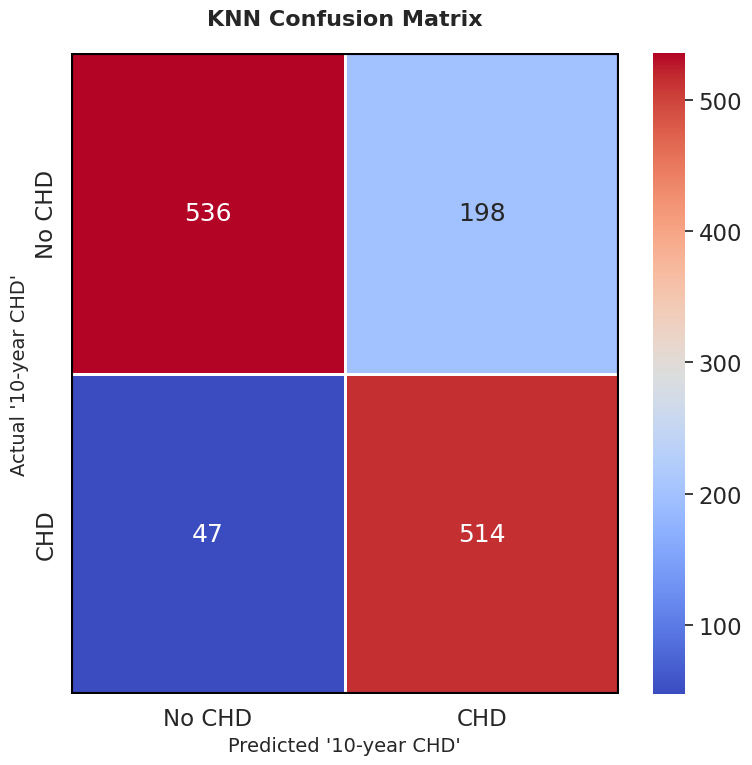

In [ ]:
y_pred_knn =knn_grid.predict(X_test)

print(classification_report(y_test, y_pred_knn))

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)


# Confusion Matrix Visualization
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
with sns.plotting_context("notebook", font_scale=1.5), sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(8,8))
    class_labels = ["No CHD", "CHD"]
    sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap='coolwarm', linewidths=2,
                xticklabels=class_labels, yticklabels=class_labels, ax=ax)
    ax.set_title('KNN Confusion Matrix', fontsize=16, weight='bold', pad=20)
    ax.set_xlabel("Predicted '10-year CHD'", fontsize=14)
    ax.set_ylabel("Actual '10-year CHD'", fontsize=14)
    ax.axhline(y=0, color='black', linewidth=3)
    ax.axhline(y=conf_matrix_knn.shape[0], color='black', linewidth=3)
    ax.axvline(x=0, color='black', linewidth=3)
    ax.axvline(x=conf_matrix_knn.shape[1], color='black', linewidth=3)
    plt.tight_layout()
    plt.show()

SVM


In [ ]:
svm_param_grid = {
    'C': [0.001,0.01,0.1,1,10,100, 200, 300, 500],
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'gamma': [0.001,0.01,0.1,1,10,100, 200, 300, 500]
}

# Initialize and train SVM with GridSearchCV
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=5)
svm_grid.fit(X_train, y_train)

# Best parameters
print("Best SVM Parameters:", svm_grid.best_params_)

KeyboardInterrupt: 

In [ ]:
y_pred_svm =svm_grid.predict(X_test)

print(classification_report(y_test, y_pred_svm))

conf_matrix_svm= confusion_matrix(y_test, y_pred_svm)

# Confusion Matrix Visualization
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
with sns.plotting_context("notebook", font_scale=1.5), sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(8,8))
    class_labels = ["No CHD", "CHD"]
    sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap='coolwarm', linewidths=2,
                xticklabels=class_labels, yticklabels=class_labels, ax=ax)
    ax.set_title('SVM Confusion Matrix', fontsize=16, weight='bold', pad=20)
    ax.set_xlabel("Predicted '10-year CHD'", fontsize=14)
    ax.set_ylabel("Actual '10-year CHD'", fontsize=14)
    ax.axhline(y=0, color='black', linewidth=3)
    ax.axhline(y=conf_matrix_svm.shape[0], color='black', linewidth=3)
    ax.axvline(x=0, color='black', linewidth=3)
    ax.axvline(x=conf_matrix_svm.shape[1], color='black', linewidth=3)
    plt.tight_layout()
    plt.show()

UCI Dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgbm
from sklearn.svm import SVC
import xgboost as xgb
import torch
import torch.nn as nn
import torch.optim as optim
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
import zipfile
import os

# Define file path
zip_path = "heart+disease.zip"
extract_path = "heart_disease"

# Extract ZIP contents
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List extracted files
os.listdir(extract_path)


['hungarian.data',
 'processed.cleveland.data',
 'heart-disease.names',
 'cleve.mod',
 'new.data',
 'ask-detrano',
 'WARNING',
 'Index',
 'processed.switzerland.data',
 'processed.va.data',
 'bak',
 'costs',
 'reprocessed.hungarian.data',
 'processed.hungarian.data',
 'long-beach-va.data',
 'switzerland.data',
 'cleveland.data']

In [ ]:
import pandas as pd

# Define column names (based on UCI documentation)
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal", "num"
]

# File paths for each dataset
'''file_paths = {
    "cleveland": f"{extract_path}/processed.cleveland.data",
    "hungarian": f"{extract_path}/processed.hungarian.data",
    "switzerland": f"{extract_path}/processed.switzerland.data",
    "va": f"{extract_path}/processed.va.data"
}'''

file_paths = {
    "cleveland": f"{extract_path}/processed.cleveland.data"
}
# Load all datasets into a dictionary
dfs = {}

for name, path in file_paths.items():
    try:
        df = pd.read_csv(path, names=columns, na_values="?")
        df["source"] = name  # Add source column to track dataset origin
        dfs[name] = df
    except Exception as e:
        print(f"Error loading {name}: {e}")

# Combine all datasets into one
full_df = pd.concat(dfs.values(), ignore_index=True)

# Check dataset info
full_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
 14  source    303 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 35.6+ KB


In [ ]:
full_df.shape

(303, 15)

In [ ]:
full_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,source
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,cleveland
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,cleveland
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,cleveland
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,cleveland
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,cleveland


In [ ]:
full_df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
full_df = full_df.dropna()

In [ ]:
full_df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
full_df.duplicated().sum()

np.int64(0)

In [ ]:
full_df.drop(columns=['source'],inplace=True)

In [ ]:
X=full_df.drop(columns=['num'])
y=full_df['num']

In [ ]:
# Convert multi-class to binary (0 = No Disease, 1+ = Disease)
y_binary = y.apply(lambda x: 1 if x > 0 else 0)



# Check class distribution before
num_before = dict(Counter(y_binary))

# Define Pipeline
over = SMOTE(sampling_strategy='auto')
under = RandomUnderSampler(sampling_strategy='auto')
steps = [("o", over), ("u", under)]
pipeline = Pipeline(steps=steps)


X_smote, y_smote = pipeline.fit_resample(X, y_binary)


num_after = dict(Counter(y_smote))
print("Before SMOTE:", num_before)
print("After SMOTE:", num_after)


Before SMOTE: {0: 160, 1: 137}
After SMOTE: {0: 160, 1: 160}


In [ ]:
print(num_before,num_after)

{0: 160, 1: 137} {0: 160, 1: 160}


In [ ]:
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


In [ ]:
X_new = new_data.iloc[:, 0:14]
y_new= new_data.iloc[:,-1]
X_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.2,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(256, 13)
(256,)
(64, 13)
(64,)


In [ ]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
X_train=pd.DataFrame(X_train_scaled)
X_test=pd.DataFrame(X_test_scaled)

In [ ]:
param_grid = {
    'n_estimators': [25, 30, 40, 50, 75, 100, 150, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [8, 9, 10, 11, 12],
    'criterion' :['gini', 'entropy']
}
randfor = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
randfor.fit(X_train, y_train)

print(randfor.best_params_)


{'criterion': 'entropy', 'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 200}


              precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.81      0.81      0.81        32

    accuracy                           0.81        64
   macro avg       0.81      0.81      0.81        64
weighted avg       0.81      0.81      0.81        64



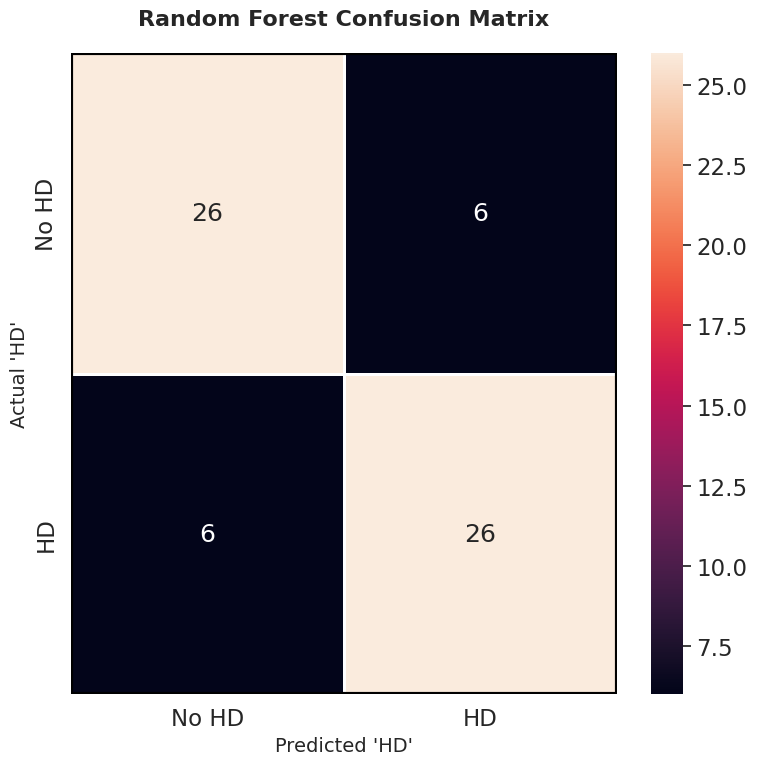

In [ ]:
y_pred_randfor = randfor.predict(X_test)

print(classification_report(y_test, y_pred_randfor))

confusion_randfor = confusion_matrix(y_test, y_pred_randfor)

with sns.plotting_context("notebook", font_scale=1.5), sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(8,8))

    class_labels = ["No HD", "HD"]
    sns.heatmap(confusion_randfor, annot=True, fmt="d", cmap='rocket', linewidths=2, xticklabels=class_labels, yticklabels=class_labels, ax=ax)
    ax.set_title('Random Forest Confusion Matrix', fontsize=16, weight='bold', pad=20)
    ax.set_xlabel("Predicted 'HD'", fontsize=14)
    ax.set_ylabel("Actual 'HD'", fontsize=14)
    ax.axhline(y=0, color='black', linewidth=3)
    ax.axhline(y=confusion_randfor.shape[0], color='black', linewidth=3)
    ax.axvline(x=0, color='black', linewidth=3)
    ax.axvline(x=confusion_randfor.shape[1], color='black', linewidth=3)

    # Improve layout
    plt.tight_layout()
    plt.show()


In [ ]:
param_grid={
    'C':[0.001,0.01,0.1,1,10,100,1000],
    'penalty':['l1','l2'],
    'solver':['liblinear']
}
logistic_regression = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
logistic_regression.fit(X_train, y_train)

print(logistic_regression.best_params_)

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}


              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.84      0.81      0.83        32

    accuracy                           0.83        64
   macro avg       0.83      0.83      0.83        64
weighted avg       0.83      0.83      0.83        64



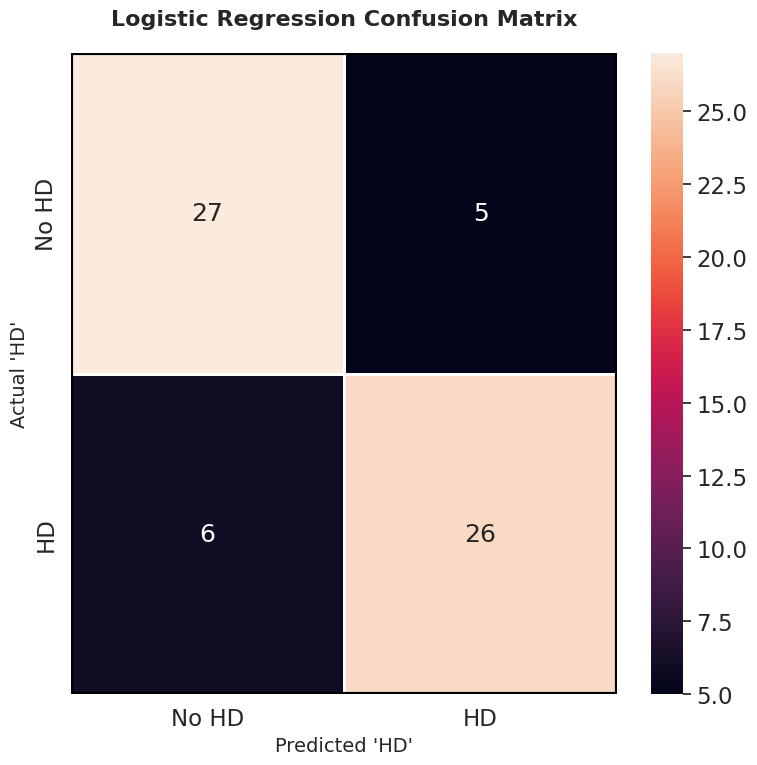

In [ ]:
y_pred_logistic =logistic_regression.predict(X_test)

print(classification_report(y_test, y_pred_logistic))

confusion_logistic = confusion_matrix(y_test, y_pred_logistic)

with sns.plotting_context("notebook", font_scale=1.5), sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(8,8))

    class_labels = ["No HD", "HD"]
    sns.heatmap(confusion_logistic, annot=True, fmt="d", cmap='rocket', linewidths=2, xticklabels=class_labels, yticklabels=class_labels, ax=ax)
    ax.set_title('Logistic Regression Confusion Matrix', fontsize=16, weight='bold', pad=20)
    ax.set_xlabel("Predicted 'HD'", fontsize=14)
    ax.set_ylabel("Actual 'HD'", fontsize=14)
    ax.axhline(y=0, color='black', linewidth=3)
    ax.axhline(y=confusion_logistic.shape[0], color='black', linewidth=3)
    ax.axvline(x=0, color='black', linewidth=3)
    ax.axvline(x=confusion_logistic.shape[1], color='black', linewidth=3)

    # Improve layout
    plt.tight_layout()
    plt.show()

In [ ]:
param_grid={
    'n_estimators':[50,100,200],
    'learning_rate':[0.01,0.1,0.2],
    'max_depth':[3,4,5,7],
    'min_child_weight':[1,3,5],
    'subsample':[0.5,0.7,0.8,1.0],
    'colsample_bytree':[0.5,0.7,0.8,1.0]
}
xgboost = GridSearchCV(xgb.XGBClassifier(n_estimators=100, objective='binary:logistic', random_state=42), param_grid, cv=5)
xgboost.fit(X_train, y_train)
print(xgboost.best_params_)

{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.5}


              precision    recall  f1-score   support

           0       0.83      0.91      0.87        32
           1       0.90      0.81      0.85        32

    accuracy                           0.86        64
   macro avg       0.86      0.86      0.86        64
weighted avg       0.86      0.86      0.86        64



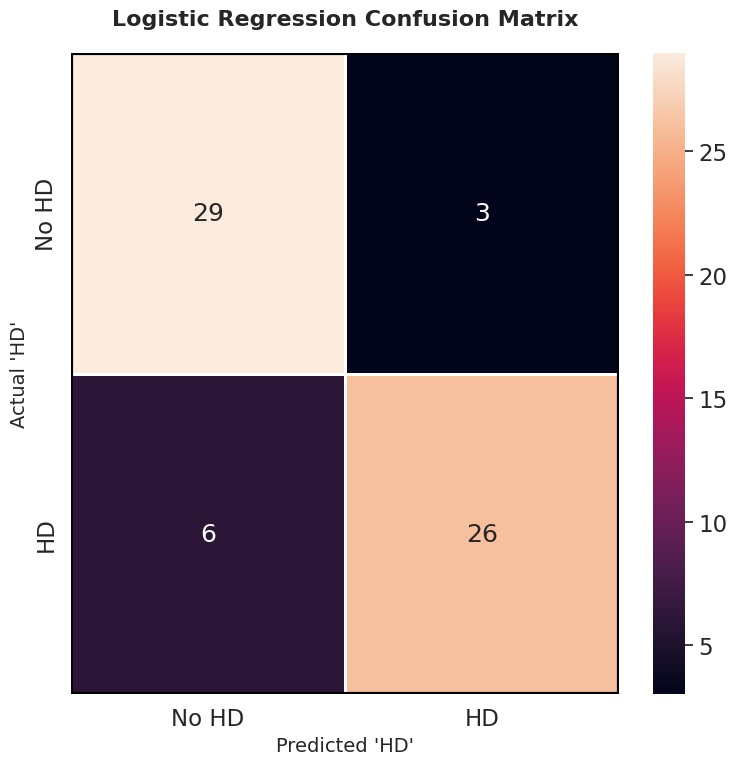

In [ ]:
y_pred_xgboost =xgboost.predict(X_test)

print(classification_report(y_test, y_pred_xgboost))

confusion_xgboost = confusion_matrix(y_test, y_pred_xgboost)

with sns.plotting_context("notebook", font_scale=1.5), sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(8,8))

    class_labels = ["No HD", "HD"]
    sns.heatmap(confusion_xgboost, annot=True, fmt="d", cmap='rocket', linewidths=2, xticklabels=class_labels, yticklabels=class_labels, ax=ax)
    ax.set_title('Logistic Regression Confusion Matrix', fontsize=16, weight='bold', pad=20)
    ax.set_xlabel("Predicted 'HD'", fontsize=14)
    ax.set_ylabel("Actual 'HD'", fontsize=14)
    ax.axhline(y=0, color='black', linewidth=3)
    ax.axhline(y=confusion_xgboost.shape[0], color='black', linewidth=3)
    ax.axvline(x=0, color='black', linewidth=3)
    ax.axvline(x=confusion_xgboost.shape[1], color='black', linewidth=3)

    # Improve layout
    plt.tight_layout()
    plt.show()

In [ ]:
svm_param_grid = {
    'C': [0.001,0.01,0.1,1,10,100, 200, 300, 500],
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'gamma': [0.001,0.01,0.1,1,10,100, 200, 300, 500]
}

# Initialize and train SVM with GridSearchCV
svm_grid = GridSearchCV(SVC(), svm_param_grid, cv=5)
svm_grid.fit(X_train, y_train)

# Best parameters
print("Best SVM Parameters:", svm_grid.best_params_)

Best SVM Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}


              precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.81      0.81      0.81        32

    accuracy                           0.81        64
   macro avg       0.81      0.81      0.81        64
weighted avg       0.81      0.81      0.81        64



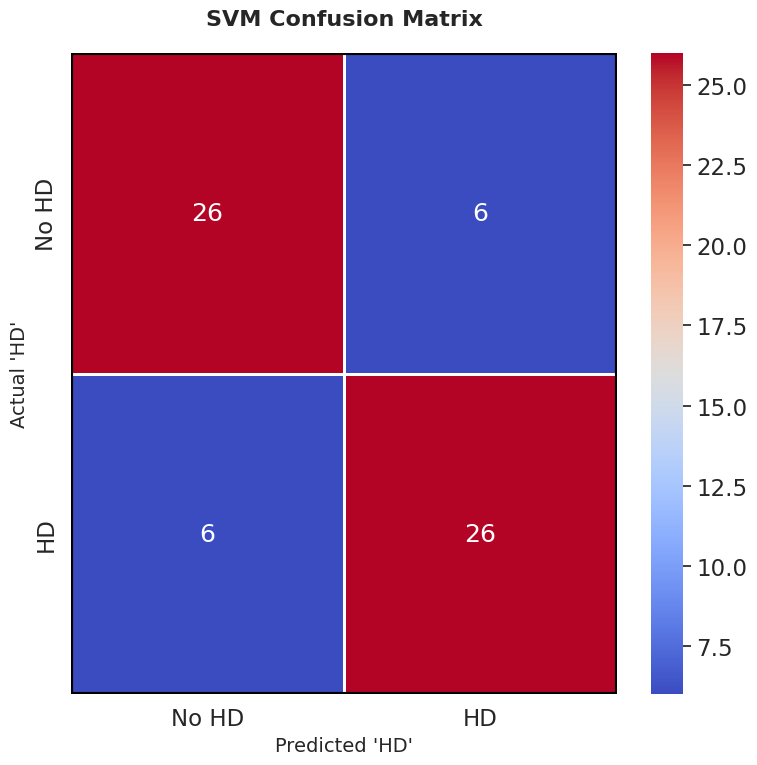

In [ ]:
y_pred_svm =svm_grid.predict(X_test)

print(classification_report(y_test, y_pred_svm))

conf_matrix_svm= confusion_matrix(y_test, y_pred_svm)

# Confusion Matrix Visualization
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
with sns.plotting_context("notebook", font_scale=1.5), sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(8,8))
    class_labels = ["No HD", "HD"]
    sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap='coolwarm', linewidths=2,
                xticklabels=class_labels, yticklabels=class_labels, ax=ax)
    ax.set_title('SVM Confusion Matrix', fontsize=16, weight='bold', pad=20)
    ax.set_xlabel("Predicted 'HD'", fontsize=14)
    ax.set_ylabel("Actual 'HD'", fontsize=14)
    ax.axhline(y=0, color='black', linewidth=3)
    ax.axhline(y=conf_matrix_svm.shape[0], color='black', linewidth=3)
    ax.axvline(x=0, color='black', linewidth=3)
    ax.axvline(x=conf_matrix_svm.shape[1], color='black', linewidth=3)
    plt.tight_layout()
    plt.show()

In [ ]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],  # Number of nearest neighbors
    'weights': ['uniform', 'distance'],  # Weighting strategy
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

# Initialize and train KNN with GridSearchCV
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)
knn_grid.fit(X_train, y_train)

# Best parameters
print("Best KNN Parameters:", knn_grid.best_params_)

Best KNN Parameters: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}


              precision    recall  f1-score   support

           0       0.83      0.78      0.81        32
           1       0.79      0.84      0.82        32

    accuracy                           0.81        64
   macro avg       0.81      0.81      0.81        64
weighted avg       0.81      0.81      0.81        64



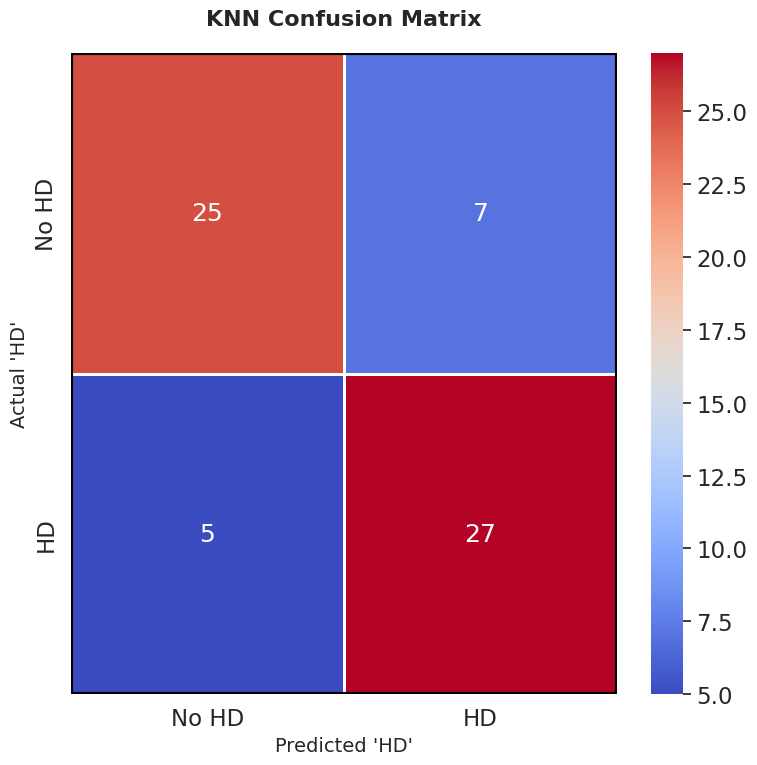

In [ ]:
y_pred_knn =knn_grid.predict(X_test)

print(classification_report(y_test, y_pred_knn))

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)


# Confusion Matrix Visualization
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
with sns.plotting_context("notebook", font_scale=1.5), sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(8,8))
    class_labels = ["No HD", "HD"]
    sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap='coolwarm', linewidths=2,
                xticklabels=class_labels, yticklabels=class_labels, ax=ax)
    ax.set_title('KNN Confusion Matrix', fontsize=16, weight='bold', pad=20)
    ax.set_xlabel("Predicted 'HD'", fontsize=14)
    ax.set_ylabel("Actual 'HD'", fontsize=14)
    ax.axhline(y=0, color='black', linewidth=3)
    ax.axhline(y=conf_matrix_knn.shape[0], color='black', linewidth=3)
    ax.axvline(x=0, color='black', linewidth=3)
    ax.axvline(x=conf_matrix_knn.shape[1], color='black', linewidth=3)
    plt.tight_layout()
    plt.show()

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1).to(device)

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self,input_size):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork(X_train.shape[1]).to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=13, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=1, bias=True)
    (5): Sigmoid()
  )
)


In [ ]:
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
epochs = 1000
batch_size = 16
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    y_pred = model(X_train_tensor)
    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")


Epoch [10/1000], Loss: 0.5917
Epoch [20/1000], Loss: 0.4571
Epoch [30/1000], Loss: 0.3617
Epoch [40/1000], Loss: 0.3252
Epoch [50/1000], Loss: 0.3056
Epoch [60/1000], Loss: 0.2854
Epoch [70/1000], Loss: 0.2651
Epoch [80/1000], Loss: 0.2443
Epoch [90/1000], Loss: 0.2219
Epoch [100/1000], Loss: 0.1984
Epoch [110/1000], Loss: 0.1736
Epoch [120/1000], Loss: 0.1487
Epoch [130/1000], Loss: 0.1249
Epoch [140/1000], Loss: 0.1028
Epoch [150/1000], Loss: 0.0835
Epoch [160/1000], Loss: 0.0670
Epoch [170/1000], Loss: 0.0532
Epoch [180/1000], Loss: 0.0421
Epoch [190/1000], Loss: 0.0333
Epoch [200/1000], Loss: 0.0265
Epoch [210/1000], Loss: 0.0214
Epoch [220/1000], Loss: 0.0174
Epoch [230/1000], Loss: 0.0143
Epoch [240/1000], Loss: 0.0120
Epoch [250/1000], Loss: 0.0102
Epoch [260/1000], Loss: 0.0088
Epoch [270/1000], Loss: 0.0076
Epoch [280/1000], Loss: 0.0067
Epoch [290/1000], Loss: 0.0059
Epoch [300/1000], Loss: 0.0052
Epoch [310/1000], Loss: 0.0047
Epoch [320/1000], Loss: 0.0042
Epoch [330/1000],

In [ ]:
model.eval()
with torch.no_grad():
    y_pred_test = model(X_test_tensor)
    y_pred_labels = (y_pred_test > 0.5).float()  # Convert probabilities to binary values (0 or 1)

# Convert predictions to numpy for evaluation
y_pred_np = y_pred_labels.cpu().numpy()
y_test_np = y_test_tensor.cpu().numpy()

# Calculate accuracy
accuracy = accuracy_score(y_test_np, y_pred_np)
print("Test Set Accuracy:", accuracy)

Test Set Accuracy: 0.734375
